## Foundations of Data Science: Inferential Thinking by Resampling

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 6: Comparing Distributions

In [45]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 9)

In [2]:
# Jury panel data
jury = pd.DataFrame({
    'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
    'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
    'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}
    )

jury.set_index('Ethnicity', inplace=True)
jury

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


In [3]:
# # Sanity check dummy data
#jury = pd.DataFrame({
#    'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
#    'Eligible': [0.05, 0.10, 0.15, 0.20, 0.50],
#    'Panels': [0.50, 0.20, 0.05, 0.10, 0.15]}
#    )

#jury.set_index('Ethnicity', inplace=True)
#jury

In [4]:
# # Sanity check dummy data
# jury = pd.DataFrame({
#     'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
#     'Eligible': [0.05, 0.10, 0.15, 0.20, 0.50],
#     'Panels': [0.04, 0.11, 0.15, 0.19, 0.51]}
#     )

# jury.set_index('Ethnicity', inplace=True)
# jury

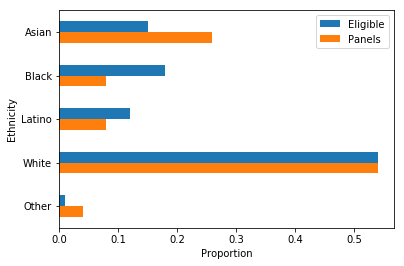

In [5]:
jury.plot.barh()
plt.gca().invert_yaxis()
plt.xlabel('Proportion')
plt.show()

In [6]:
# Chi-squared test for distribution 
#   null hypothesis that the categorical data has the given frequencies
n = 1453  #  panel size was 1453
print(stats.chisquare(jury['Panels'] * n, jury['Eligible'] * n))

Power_divergenceResult(statistic=348.07422222222226, pvalue=4.568494800707335e-74)


In [7]:
jury['Difference'] = jury['Panels'] - jury['Eligible']
jury

,Eligible,Panels,Difference
Ethnicity,,,
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.10
Latino,0.12,0.08,-0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


In [8]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [11]:
total_variation_distance(jury['Panels'], jury['Eligible'])

0.14

In [89]:
# Test by simulation
def sim_jury_panel_prop(jury, n=1453):
    ''' Returns ethnicity proporions for simulated jury'''
    sim_panel = np.random.choice(jury.index.values, size=n,
                                  p=jury.Eligible.values) 
    sim_counts = Counter(sim_panel)
    return [sim_counts[ethnicity] / n for ethnicity in jury.index.values]

In [97]:
var_dists = [total_variation_distance(sim_jury_panel_prop(jury), jury['Eligible'])
             for _ in range(10000)]

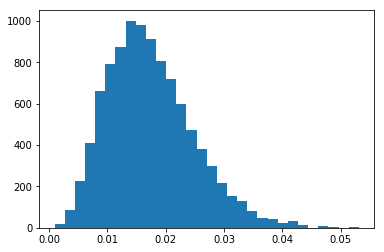

In [98]:
plt.hist(var_dists, bins=30)
plt.show()